In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



2024-10-29 22:16:15.466995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-29 22:16:15.643870: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-29 22:16:15.705719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-29 22:16:15.963301: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-29 22:16:21.075440: W tensorflow/compiler/tf2

In [2]:
# Load the dataset
file_path = '/home/guoguo/projects/QML/data/gradient_under_precision.csv'
data = pd.read_csv(file_path)

# Selecting the input and output columns
input_columns = ['B_freq', 'B_ampl', 'x_offset', 'y_offset', 'z_offset']
output_columns = ['g1_x', 'g1_y', 'g1_z', 'g2_x', 'g2_y', 'g2_z']

X = data[input_columns]
y = data[output_columns]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [3]:
model = Sequential([
    Dense(1024, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(1024, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Dense(512, activation='relu'),
    # Dense(512, activation='relu'),
    # Dense(512, activation='relu'),
    # Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(6)  # Output layer with 6 neurons for 6 target variables
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
# save the model
model.save('/home/guoguo/projects/QML/models/gradient_under_precision.h5')




/home/guoguo/anaconda3/envs/VAM/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1730211440.144053 1629331 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730211440.144973 1629331 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-29 22:17:20.577890: W tensorflow/core/co

Epoch 1/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - loss: 1.9644e-05 - mae: 0.0021 - val_loss: 2.2823e-08 - val_mae: 1.1955e-04
Epoch 2/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 1.8928e-08 - mae: 1.0850e-04 - val_loss: 1.7699e-08 - val_mae: 1.0436e-04
Epoch 3/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 1.1984e-08 - mae: 8.5913e-05 - val_loss: 1.6323e-08 - val_mae: 1.0177e-04
Epoch 4/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 1.1883e-08 - mae: 8.5567e-05 - val_loss: 1.4391e-08 - val_mae: 9.4953e-05
Epoch 5/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 1.5249e-08 - mae: 9.6193e-05 - val_loss: 1.1551e-08 - val_mae: 8.3548e-05
Epoch 6/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 1.3433e-08 - mae: 8.6410e-05 - val_loss: 5.2052e-09 - val_mae: 5.7001e-05
Epoch 7/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 1.0393e-08 - mae: 7.8662e-05 - val_loss: 1.3838e-08 - val_mae: 9.1896e-05
Epoch 8/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/

In [4]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=1)

# Predict the output
y_pred_nn = model.predict(X_test_scaled)

# Display the evaluation results
print("Mean Absolute Error (MAE) on test set:", mae)

# Optional: Save predictions to CSV
predictions_df = pd.DataFrame(y_pred_nn, columns=output_columns)
predictions_df.to_csv('nn_predictions.csv', index=False)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9390e-09 - mae: 3.0784e-05
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Mean Absolute Error (MAE) on test set: 3.068769728997722e-05


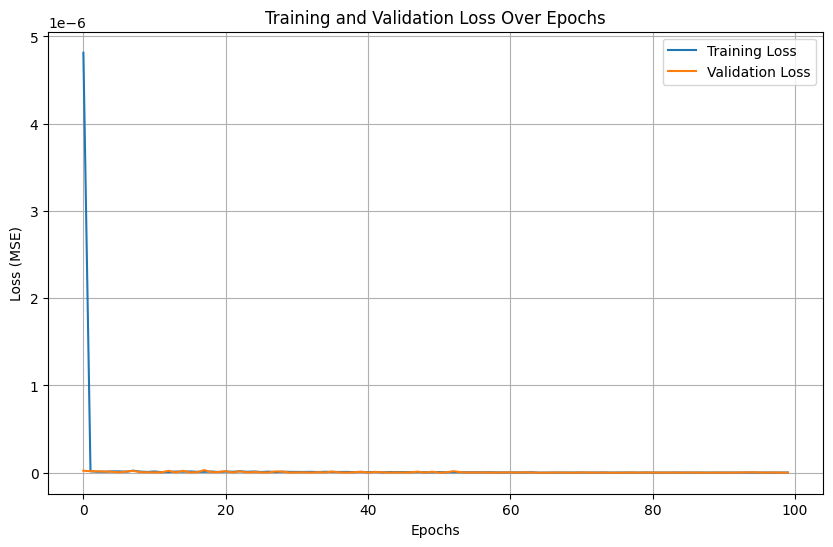

In [5]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


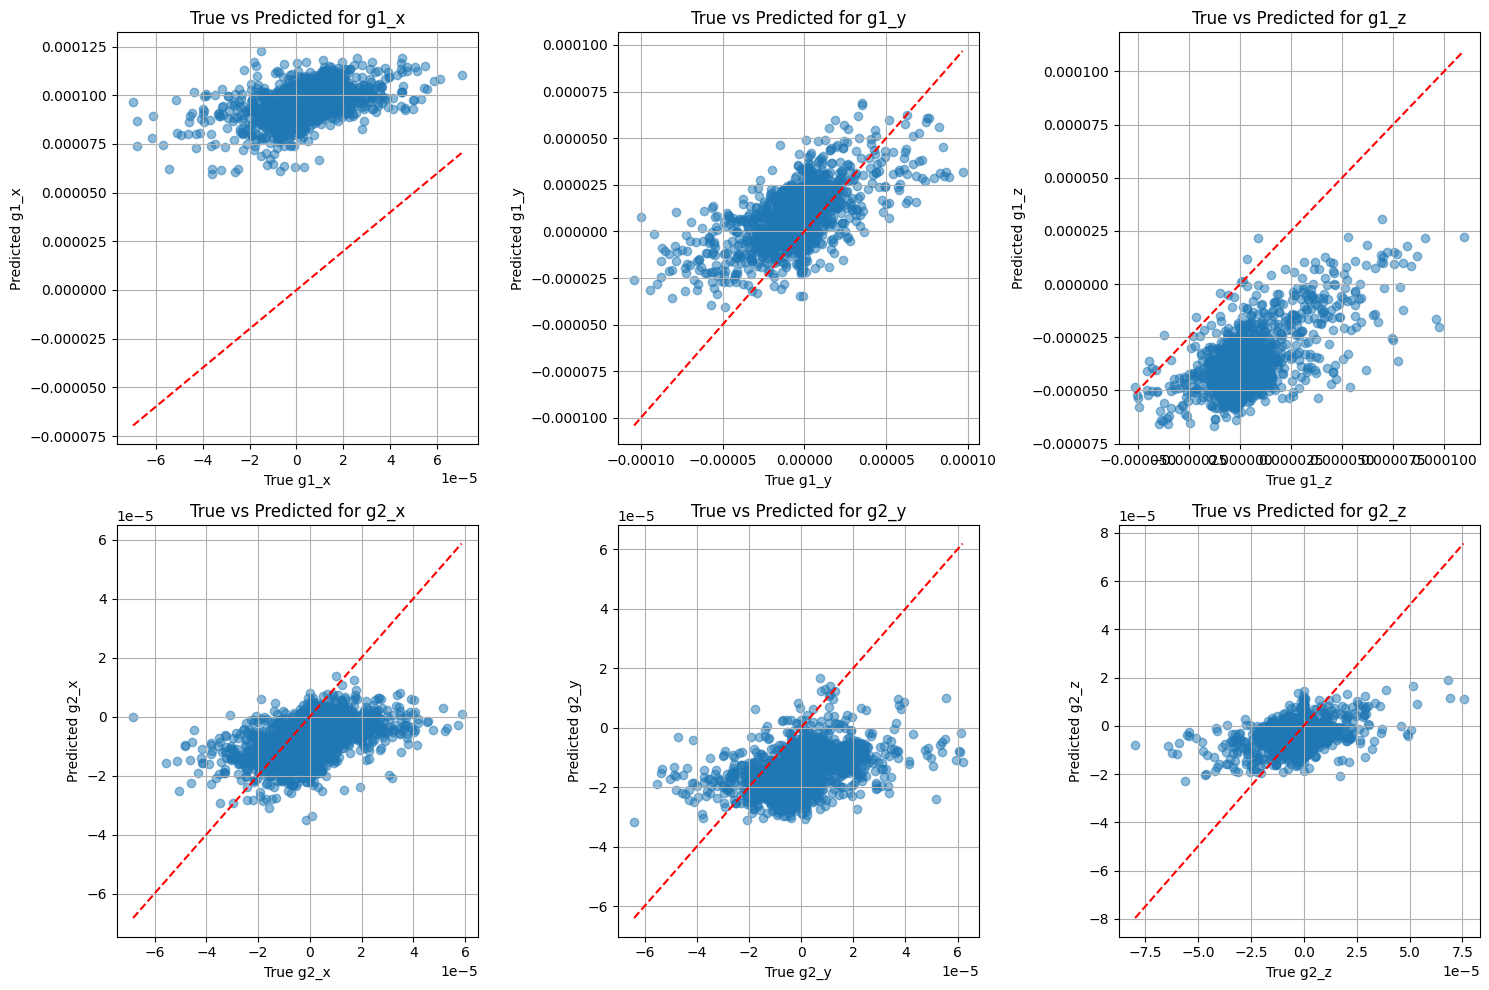

In [8]:
y_test_np = y_test.to_numpy()

# Plotting true vs predicted values for each output variable
output_vars = output_columns

plt.figure(figsize=(15, 10))
for i, var in enumerate(output_vars):
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_test_np[:, i], y_pred_nn[:, i], alpha=0.5)
    plt.xlabel('True ' + var)
    plt.ylabel('Predicted ' + var)
    plt.title(f'True vs Predicted for {var}')
    plt.plot([y_test_np[:, i].min(), y_test_np[:, i].max()], 
             [y_test_np[:, i].min(), y_test_np[:, i].max()], 'r--')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# plot the learnin curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE Over Epochs')
plt.legend()